<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/Estadistica-con-python-probabilidad-y-muestreo/estadistica-con-python-probabilidad-y-muestreo-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 2</font>
***

Datos

Si trabajas con archivos en español o creados con Excel en Windows, latin1 o ISO-8859-1 son muy comunes.

Si son archivos más modernos o de la web, utf-8 suele ser lo correcto.

* Nota: al exportar archuvos csv, exel o json recordan el dormato unicode y verificar que archivo esta el formato

# <font color=green>1 CONOCIENDO LOS DATOS</font>
***

## <font color=green>1.1 Dataset del proyecto</font>
***

### Encuesta Nacional por Muestreo de Hogares - 2015

La **Encuesta Nacional por Muestreo de Hogares - ENMH** en Brasil anualmente investiga, de manera permanente, características generales de la población, educación, trabajo, ingresos, vivienda y otras, con frecuencia variables, de acuerdo a las necesidades de información del país, tales como las características de migración, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilación de estas estadísticas constituye, durante los 49 años de realización de la investigación, un importante instrumento para la formulación, validación y evaluación de políticas orientadas al desarrollo socioeconómico y la mejora de las condiciones de vida en Brasil.

### Fuente de los Datos

Instituto Brasileño de Geografía y Estadística (IBGE) Encuesta Nacional por Muestreo de Hogares(PNAD) en el 2015

### Variables utilizadas

> ### Ingresos
> ***

Ingresos mensuales del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del residente en años en la fecha de referencia .

> ### Altura (elaboración propia)
> ***

Altura del habitante en metros.

> ### UF (unidad federal de brasil)
> ***

Unidad Federal

|Código|Descripción|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin educación o menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No determinado|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indígena|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Pardo|
|9|Sin declarar|

#### <font color='red'>Nota</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que **Ingreso** no era válido. (999 999 999 999);
> 2. Se eliminaron los registros en los que **Ingreso** eran missing;
> 3. Solo se consideraron los registros de **Personas de Referencia** de cada hogar (responsable del hogar).

"es importante siempre especificar el tratamiento de datos que se realizo a estos, en todos los reportes"

### Importando pandas y otras bibliotecas, asi como leyendo el dataset del proyecto

https://pandas.pydata.org/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install scipy
import scipy.stats as stats

print('version de pandas---->%s'%pd.__version__)
print('version de numpy---->%s'%np.__version__)


version de pandas---->2.2.2
version de numpy---->2.0.2


In [ ]:
url='https://raw.githubusercontent.com/Kevincancino26/mis-notebook-de-estudio-/main/Estadistica-con-python-probabilidad-y-muestreo/datos.csv'
try:
  datos = pd.read_csv(url, encoding='latin1')# se usa la codificacion latin1 y la funcion encoding dado que tenemos caracteres ñ o otra con otro tipo de aditamento
except UnicodeDecodeError:
  datos = pd.read_csv(url, encoding='ISO-8859-1')
datos.head()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---
---

# <font color=green>2 DISTRIBUCIONES DE PROBABILIDAD</font>
***

Generalmente cunado evaluamos como una variable aletaroria se distribuye conseguimos identificar diferentes tipos de distribuciones de frecuencias o de probabilidad.

hablaremos de las 3 mass utilizadas

* binomial
* depoison
* normal

se comensara con un problema y se resolvera con la distribucion se encaje mejor


## <font color=red>Problema</font>
***

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide hacer la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

## <font color=green>2.1 Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de que solo ocurran dos categorías. Estas categorías juntas representan todo el espacio muestral, siendo también mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas que involucran situaciones de **éxito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tienen éxito

### Experimento Binomial

1. Realización de $n$ pruebas idénticas.

2. Las pruebas son independientes.

3. Solo son posibles dos resultados, por ejemplo: Verdadero o falso; Cara o cruz; Éxito o fracaso.

4. La probabilidad de éxito está representada por $p$ y la probabilidad de fracaso por $1-p = q$. Estas probabilidades no cambian de una prueba para otra.

### Media de la distribución binomial

El valor esperado o la media de la distribución binomial es igual al número de experimentos realizados multiplicado por la probabilidad de que ocurra el evento.

# $$\mu = n \times p$$

### Desviación estándar de la distribución binomial

La desviación estándar es la raíz quadrada del producto entre el número de experimentos, la probabilidad de éxito y la probabilidad de fracaso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [ ]:
from scipy.special import comb # se importa la funcion especifica de la libreria importando la funcion comb

### Combinaciones

El número de combinaciones de $n$ objetos, tomando $k$ cada vez, es:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

n factorial
es el producto regresivo de n de caada uno de los numeross anteriores que habia hasta el numero que estamos trabajando es decir si tenemos 5 es 5*(5-1)asi hasta llegar a uno



## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición

## $$0! = 1$$

## <font color='blue'>Ejemplo: Mega Sena</font>

En una rueda de lotería Mega Sena tenemos un total de **60 números** para elegir, donde la apuesta mínima es de **seis números**. Usted que es curioso(a) decide calcular la probabilidad de ganar la Mega Sena con solo **un juego**. Para eso necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$



si lo hacemos a pepel seria una cuenta larga pero al hacerlo con python tenemos esto

In [ ]:
combinaciones= comb(60,6)
combinaciones# tenemoss el numero total de eventos posibles de coger los 6 o las 6 combiunaciones que se pueden formar entre 1 a 60 de seis numero

np.float64(50063860.0)

In [ ]:
#cual seria la porpabilidad de ganar( uno dividido entre el tamaño total de muestra)
probabilidad=1/combinaciones
print(f'{probabilidad:0.15f}')# con esto especificamos la cantidad de digitos que queremos deribado que noss daba en notacion cienteifica x10
#con essto tenemos la probabilidad de ganar esta lotaria es:
#con esto vemo que tenemos bastantes opcviones de escoger las combinaciones de 6 numeros de la muestra ciendo solo una ganadora, teniendo la posibilidad
#de ganar del :


0.000000019974489


exposicion de premios

supongamos que acabamos de crear yub hyefi de kiterua kkanadi exoisucion de oremiosn, en este juego, el quye apuesta marca 20 numeros, de lo 25 disponibles, y puede ganar un millon de dolares

determina el numero de convinacione sposisble y la probabilidad de ganar con un solo boleto

In [ ]:
exposicion=comb(25,20)
exposicion

np.float64(53130.0)

In [ ]:
proba=1/exposicion
print(f'{proba:0.15f}')

0.000018821757952


## <font color='blue'>Ejemplo: Concurso para científico de datos</font>

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

### ¿Cuál es la cantidad de pruebas ($n$)?

In [ ]:
n=10
n

10

### ¿Las pruebas son independientes?

Sí. deribado que el canditado esta intentando adivinar las resspuestass cada pregunta no afecta el resultado de la otra, es decri cada pregunta no tiene relacion con la siguiete

### ¿Sólo dos resultados son posibles en cada prueba?

Sí. El candidato tiene dos posibilidades, ACERTAR o FALLAR una pregunta.

### ¿Cuál es la probabilidad de éxito ($p$)?

In [ ]:
numero_de_alternativas_por_pregunta=3
p=1/numero_de_alternativas_por_pregunta
p

0.3333333333333333

### ¿Cuál es la probabilidad de fracaso ($q$)?

In [ ]:
q=1-p# por que sabemos que q+p debe de dar 1
q

0.6666666666666667

### ¿Cuál es el número total de eventos para tener éxito ($k$)?

In [ ]:
#primera parte del problema"cual es la probabilidad de que el candidato acierte 5 preguntas"
k=5
k

5

### Solución 1

In [ ]:
probabilidad=(comb(n,k)*(p**k)*(q**(n-k)))
print(f'la porbabilidad de acertar 5 preguntas es de: {probabilidad:.8f}')

la porbabilidad de acertar 5 preguntas es de: 0.13656455


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [ ]:
from scipy.stats import binom

### Solución 2

In [ ]:
probabilidad2= binom.pmf(k,n,p)
print(f'la porbabilidad de acertar 5 preguntas es de: {probabilidad2:.8f}')

la porbabilidad de acertar 5 preguntas es de: 0.13656455


### Obtenga la probabilidad de que el candidato apruebe

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

In [ ]:
#el canditato va a pasar i saca 5,6,7...10
#la primera opcion de calculo es la mas laboriosa y mas intuitiba, calcular cada una y sumarlos
#la probabilidad que el candidato aprube?
binom.pmf(5,n,p)+binom.pmf(6,n,p)+binom.pmf(7,n,p)+binom.pmf(8,n,p)+binom.pmf(9,n,p)+binom.pmf(10,n,p)

np.float64(0.21312808006909476)

In [ ]:
#segunda opcion
binom.pmf([5,6,7,8,9,10],n,p).sum()

np.float64(0.21312808006909476)

In [ ]:
#tercera opcion
#utilissando la funcion acumulativa: cdf
1-binom.cdf(4,n,p)#significa que se sumaran todas las posibilidades que hay hasssta 4, me dara la probabilidad de aceptar 0 ninguna pregunta hassta aceptar 1,2,3,4 total, maximo 4v preguntas
#pero a nosotros lo que queremos la probabilidad de aceptar minimo 5 y esta nos esta poniendo aceoptar maximo 4, entonces lo que queremos es acepotar 1 - menos lq probabilidad e aceptar 4 preguntas


np.float64(0.21312808006909523)

In [ ]:
#otra funcion que nos permite hacer lo mismo, quees binom.sf, esta funcion hace lo mimo que la anterior, nos da la probabilidad de que el cantidato apruebe
binom.sf(4,n,p)

np.float64(0.21312808006909525)

una moneda perfectamente equilibrada se lanza al aire cuatro veces. usando la distribucion binomial, obtenga la probabilidad de que la moneda caiga con la cruz hacia arriba dos veces

In [ ]:
n2=4
p2=1/2
q2=2
k2=2
binom.pmf(k2,n2,p2)


np.float64(0.375)

un dado perfectamente equilibrado se lanza hacia arriba diez veces. Ussando la distribucion binomial, opbtenga lka probabilidad deq ue los dados caigan con el numero cinco hacia arriba al menos tres veces

In [ ]:
n=10

p=1/6
binom.pmf([3,4,5,6,7,8,9,10],n,p).sum()

np.float64(0.22477320212874055)

## <font color='blue'>Ejemplo: Yincana</font>
la media de la distribucion binomial

Una ciudad del interior realiza una yincana cada año para recaudar fondos para el hospital de la ciudad. En la última competencia se sabe que la **proporción de mujeres participantes fue del 60%**. **El número total de equipos, con 12 miembros, inscritos en la yincana de este año es 30**. Con la información anterior, responda: ¿Cuántos equipos deberían estar formados por **8 mujeres**?

### Solución

In [ ]:
#cual es la probabilidad de un equipo de estar formado por 8 mujeres y 4 hombnres?
#con la informacion los participantes deben ser : M=60%, H=40% el chance de seleccionar a alguna mujer es poco mayor que el de un hombre, por lo tanto tenemos que hacerlo
#12 veces para llenar lo que nos especifica
p=0.6 #el porcentaje de exito de mujeres participantes
n=12#total de miembros que conforman eun equipo
k=8#cantidad de mujeres que se requiere en un equipo


In [ ]:
#calcularemos la propabilidad de tener 8 mujeres en cada equipo
Probabilidad=binom.pmf(k,n,p)

print(f'la probabilidad de seleccionar un equipo con 8 mujeres es: {Probabilidad:.2f}')

la probabilidad de seleccionar un equipo con 8 mujeres es: 0.21


In [ ]:
#cuantos de los 30 equipos pueden estar formados con esta configuracion?
#ahora la probabilidad anterior pasa hacer la probabilidad de exito de elegir un equipo con 8 mujeres
p2_1=Probabilidad
n2_1=30
#por lo tanto ahora vamos a calcular la media de la distribucion minomial para calcularlo que es mu=n*p

In [ ]:
equipos=n2_1*p2_1
equipos # por lo tanto se tendrian 7 quipos de los 30 conformados por 8 mujeres y 4 hombres

np.float64(6.3852281856)

supongamos que la probabilidad de que una pareja tenga hijos con ojos azulkes es del 22%. En 50 familias, con 3 hijos cada una, ¿cuantas podemo epserar que tengan dos hijos con ojos azules?

In [ ]:
probabilidad_ojos=binom.pmf(2,3,0.22)#probabilidad de una familia tenga dos hijos con ojos azules de 3 hijos
probabilidad_ojos*50

np.float64(5.662799999999996)

---
---

## lo que aprendimos



* Los conceptos basicos de la distribucion binomial de probabilidad
* identificar y resolver problemas que involubran un experimento binomial
* obtener la porbabilidad de eventos que involuvran solo dos posibilidades de resultado

## <font color=red>Problema</font>
***

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

## <font color=green>2.2 Distribución Poisson</font>
***

Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero no poder contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribución de Poisson tenemos la determinación del número de clientes que ingresan a una tienda en un momento determinado, el número de autos que llegan a un Auto-servicio de una cafetería a la hora del almuerzo, la determinación del número de accidentes registrados en un tramo de carretera, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio dado

$k$ = número de éxitos en el intervalo deseado

### Experimento Poisson

1. La probabilidad de que ocurra es la misma en todo el intervalo observado.

2. El número de ocurrencias en un intervalo dado es independiente del número de ocurrencias en otros intervalos.

3. La probabilidad de que ocurra es la misma en intervalos de igual longitud.

### Media de la distribución Poisson

# $$\mu$$

### Desviación estándar de la distribución Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

In [ ]:
np.e

2.718281828459045

## <font color='blue'>Ejemplo: Delivery</font>

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

### ¿Cuál es el número promedio de ocurrencias por hora ($\mu$)?

In [ ]:
media=20
media

20

### ¿Qué número de ocurrencias queremos obtener en el período ($k$)?

In [ ]:
k=15
k

15

### Solución 1

In [ ]:
import math
#manual
probabilidad=((np.e**(-media))*(media**k))/(math.factorial(k))
print(f'la probabilidad de que el restaurante reciba 15 pedidos es de: {probabilidad:.8f}')

la probabilidad de que el restaurante reciba 15 pedidos es de: 0.05164885


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solución 2

In [ ]:
from scipy.stats import poisson
probabilidad=poisson.pmf(k,media)
print(f'la probabilidad de que el restaurante reciba 15 pedidos es de: {probabilidad:.8f}')

la probabilidad de que el restaurante reciba 15 pedidos es de: 0.05164885


---
---

por lo tanto decimos que la porbabildiad de que el restaurante resiva 15 pedidos en determinada hora es de 51.64% en determinada hora dado que la media son de 20 pedidos los que resive

##ejercicio

El número media de clientes que ingresan a una panadería por hora es 20. Obtenga la probabilidad de que, en la próxima hora, ingresen exactamente 25 clientes.

In [ ]:
m=20
k=25
probabilidad=poisson.pmf(k,m)
print(f'la probabilidad de que en la proxima hora ingresen 25 clientes es de: {probabilidad:.4f}')

la probabilidad de que en la proxima hora ingresen 25 clientes es de: 0.0446


## Lo que aprendimos

Los conceptos básicos de la distribución de probabilidad Poisson
Obtener probabilidades en problemas como los siguientes:
Determinar la cantidad de clientes que ingresan a una tienda en un momento dado
Número de autos que llegan al parqueo de un restaurante a la hora del almuerzo
Determinación del número de accidentes registrados en un tramo de carretera

## <font color=red>Problema</font>
***

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, sea menor de 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, tenga entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, tenga más de 1.90 metros.


## <font color=green>2.3 Distribución Normal</font>
***

La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica en relación con su media.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img001.png' width='500px'>

### Características importantes

1. Es simétrica alrededor de la media;

2. El área bajo la curva corresponde a la proporción 1 o 100%;

3. Las medidas de tendencia central (media, mediana y moda) tienen el mismo valor;

4. Los extremos de la curva tienden al infinito en ambas direcciones y, teóricamente, nunca tocan el eje $x$;

5. La desviación estándar define la planitud y el ancho de la distribución. Las curvas más anchas y planas tienen valores de desviación estándar más altos;

6. La distribución se define por su media y desviación estándar;

7. La probabilidad siempre será igual al área bajo la curva, delimitada por los límites superior e inferior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

La probabilidad se obtiene del área bajo la curva, delimitada por los límites superior e inferior especificados. Se puede ver un ejemplo en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img002.png' width='500px'>


Para obtener el área anterior, simplemente calcule la integral de la función para los intervalos determinados. Según la siguiente ecuación:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

$L_i$ = límite inferior

$L_s$ = límite superior

### Tablas estandarizadas

Se crearon tablas estandarizadas para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para ver los valores en una tabla estandarizada, simplemente transforme nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa la desviación en las desviaciones estándar de un valor de la variable original en relación con la media.

# $$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviación estándar $\sigma$

$\sigma$ = desviación estándar

$\mu$ = media

### Construyendo la tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_normal_estandarizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_normal_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)

tabla_normal_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img003.png' width='250px'>

La tabla anterior proporciona el área bajo la curva entre $-\infty$ y $Z$ desviaciones estándar por encima de la media, es decri el valor va desde menso inficito hasta el valro Z. Recordando que dado que estos son valores estandarizados, tenemos $\mu = 0$.

## <font color='blue'>Ejemplo: ¿Cuánto mides?</font>

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, mida menos que 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, mida entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, mida más de 1.90 metros.

### Problema A - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img004.png' width='350px'>


### Obtener la variable estandarizada $Z$

In [ ]:
#primero definir los parametros de la variabale para su estandarisacion
media=1.70
desviacion_esstandar=0.1


In [ ]:
z=(1.8-media)/desviacion_esstandar
z

1.0000000000000009

### Solución 1 - Utilizando la tabla

la probabilidad de que una persona tenga una altura menor a 1.80m es de:

In [ ]:
probabilidad=0.8413
probabilidad

0.8413

### Solución 2 - Utilizando Scipy

In [ ]:
from scipy.stats import norm #utilizaremos la funcion de distribucion acumulada de scipy que nos da el area bajo la curba
print(norm.cdf(z))

0.8413447460685431


## prueba de etadistica

La aplicación de una prueba Estadística en una competencia presentó un conjunto de notas normalmente distribuidas. Se encontró que el conjunto de notas tenía una media de 70 y una desviación estándar de 5 puntos.

¿Qué probabilidad hay de que un estudiante, seleccionado al azar, obtenga una puntuación inferior a 85 puntos

In [ ]:
me=70
desviacion=5
z1=(85-me)/desviacion
norm.cdf(z1)

np.float64(0.9986501019683699)

### Problema B - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img005.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [ ]:
z=(1.7-media)/desviacion_esstandar
z

0.0

In [ ]:
z=(1.8-media)/desviacion_esstandar
z

1.0000000000000009

### Solución 1 - Utilizando la tabla

In [ ]:
probabilidad=0.8413
probabilidad


0.8413

las probabilidad de una persona tenga la altura de 1.60 a 1.80 es de:

In [ ]:
probabilidad=(0.8413-0.5)*2
probabilidad

0.6826000000000001

### Solución 2 - Utilizando Scipy

In [ ]:
z_s=(1.8-media)/desviacion_esstandar
z_s

1.0000000000000009

In [ ]:
probabilidad1=norm.cdf(z_s)- (1-norm.cdf(z_s))
print(probabilidad1)

0.6826894921370863


In [ ]:
z_l=(media-1.6)/desviacion_esstandar
z_l

0.9999999999999987

In [ ]:
probabilidad2=norm.cdf(z_l)- (1-norm.cdf(z_l))
print(probabilidad2)

0.6826894921370852


## facturacion diaria

La facturación diaria de un controlador de aplicación sigue una distribución aproximadamente normal, con un media de $ 300,00 y una desviación estándar igual a $ 50,00. Obtenga las probabilidades de que, en un día aleatorio, el conductor gane:

1) Entre $ 250,00 y $ 350,00

2) Entre $ 400,00 y $ 500,00

In [ ]:
#probabilidad que gane entre 250 y 350
m2=30000
desv=5000
z_s=(35000-m2)/desv
Z_inferior = (25000 - m2) / desv
probabilidad1=norm.cdf(z_s)-norm.cdf(Z_inferior)
print(f'{probabilidad1:2%}')

68.268949%


In [ ]:
(1-68.26)/2

-33.63

In [ ]:
#probabilidad que gane entre 250 y 350
m2=30000
desv=5000
z_s=(50000-m2)/desv
Z_inferior = (40000 - m2) / desv
probabilidad1=norm.cdf(z_s)-norm.cdf(Z_inferior)
print(f'{probabilidad1:2%}')

2.271846%


### Problema C - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img006.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [ ]:
z_s=(1.9-media)/desviacion_esstandar
z_s

1.9999999999999996

### Solución 1 - Utilizando la tabla

para ssaber el porcentaje de personas que salgan con mayor altura a 1.90 restamos a 1 dado que el valor de la tabla z es el varlo de probabilidad que tenemos hasta nuestro parametro de variable que es 1.90

In [ ]:
probabilidad=1-0.9767
probabilidad

0.023299999999999987

### Solución 2 - Utilizando Scipy

In [ ]:
probabilidad=1-norm.cdf(z_s)
print(f'{probabilidad:0.5f}')

0.02275


In [ ]:
probabilidad=norm.cdf(-z_s)
print(f'{probabilidad:0.5f}')

0.02275


nos da el mismo valor porque si nosotros le ponemos +z_s, nos dara el area acumulada de la probabilidad, es el area en blanco de nuestra grafica bajo la curba, pero si ponemos en negaivo -z_s, esta dando la probabilidad arriba de nuestro parametro

##vida util

Una empresa verificó que las lámparas incandescentes XPTO tienen una vida útil normalmente distribuida, con un media igual a 720 días y una desviación estándar igual a 30 días. Calcula la probabilidad de que una lámpara, elegida al azar, dure:

1) Entre 650 y 750 días

2) Más de 800 días

3) Menos de 700 días

In [ ]:
#Entre 650 y 750 días
media=720
desviacion12=30
z_s=(750-media)/desviacion12
z_i=(650-media)/desviacion12
probabilidad=norm.cdf(z_s)-norm.cdf(z_i)
print(f'{probabilidad:.2%}')

83.15%


In [ ]:
#Más de 800 días
x=(800-media)/desviacion12
probabilidad=1-norm.cdf(x)
print(f'{probabilidad:.2%}')


0.38%


In [ ]:
#Menos de 700 días
x=(700-media)/desviacion12
probabilidad=norm.cdf(x)
print(f'{probabilidad:.2%}') # cuando es menos a la media en nustra grafica no restamos con uno dado que el indice de probabilidad acumulada nos dice es de
#infinito hasta nuestro limite de la variable 700, es decir que descartamo el resto que esta despues de este limite bajo nuestra curba

25.25%


Usando la tabla estandarizada, o las herramientas proporcionadas por Python, encuentre el área debajo de la curva normal para los valores Z a continuación:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59

In [ ]:
#1) Z < 1,96
probabilidad=norm.cdf(1.96)
print(f'{probabilidad:.2%}')

97.50%


In [ ]:
#2) Z > 2,15
probabilidad=1-norm.cdf(2.15)
print(f'{probabilidad:.2%}')

1.58%


In [ ]:
#3) Z < -0,78
probabilidad=norm.cdf(-0.78)
print(f'{probabilidad:.2%}')

21.77%


In [ ]:
#4) Z > 0,59
probabilidad=1-norm.cdf(0.59)
print(f'{probabilidad:.2%}')

27.76%


## lo aprendido

Los conceptos básicos de la distribución de probabilidad Normal
Trabajar con la tabla estandarizada Z
Obtener las probabilidades usando la distribución normal en un conjunto de situaciones

# <font color=green>3 MUESTREO</font>
***

## <font color=green>3.1 Población y Muestra</font>
***

### Población
Conjunto de todos los elementos de interés de un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Poblaciones finitas

Permiten el recuento de sus elementos. Los ejemplos incluyen el número de empleados en una empresa, el número de estudiantes en una escuela, etc.

### Poblaciones infinitas

No es posible contar sus elementos. Como ejemplos tenemos el número de porciones que se pueden extraer del agua del mar para su análisis, la temperatura medida en cada punto de un territorio, etc.

<font color=red>Cuando se pueden contar los elementos de una población, pero presentando una cantidad muy grande, se supone que la población es infinita.</font>

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El enfoque principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre parámetros poblacionales utilizando información de la muestra.

## <font color=green>3.2 ¿Cuándo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad en accidentes de tráfico.

### Resultados rápidos

Investigaciones que necesitan más agilidad en la difusión. Ejemplo: encuestas de opinión, encuestas sobre problemas de salud pública.

### Altos precios

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>3.3 Muestreo Aleatorio Simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

In [ ]:
datos.shape[0]#lineas que tiene mi dataframe

76840

In [ ]:
datos.Ingreso.mean()

np.float64(2000.3831988547631)

cuando seleccionamos suna muestra, solo es para aser inferencia obre los parametros de la poblacion, en caso de que sea representativa con u error controlado, llegaremos a unm valor proximo a 2000 cuando llegamos al valor de la media de ingreso

In [ ]:
#vamos a seleccionar una muestra de nuestr apoblacion
muestra=datos.sample(n=1000,random_state=101)#con random state especificamos el generador de numeros aleatorios
#¡Alternativa correcta! Perfecto, en clase usamos el parámetro random_state, que es la semilla para el generador de números aleatorios (utilícelo si desea repetir el proceso y mantener la misma muestra seleccionada).

In [ ]:
muestra.shape[0]

1000

In [ ]:
muestra.Ingreso.mean()

np.float64(1998.783)

optuvimos un pequeño resultado diferrente al anterior, deribado que este es una muestra, es decir que nos dara un pequeño margen de error y entre mas grande la muestra mass se hacercara a la media que calculamos anterior mente

In [ ]:
#muestra de los datos sexo
datos.Sexo.value_counts(normalize=True)

,proportion
Sexo,
0,0.692998
1,0.307002


In [ ]:
#vamos a comparar con la muestra que tenemos, viewndo si esto se mantiene en nuestra muestra
#dado que si realmente fue escogida de manera aleatoria se espera que lass proporciones que represente
#muestre las mismas que la poblacion
muestra.Sexo.value_counts(normalize=True)

,proportion
Sexo,
0,0.706
1,0.294


como podemos ver, son ssimilares con los valores que tenemos de nuestra poblacion, ahora como no uamo sninguna tecninca para escoger el tamaño de la  muestra, no tenemos certesa de que el ressultado sea una muestra representativa de la poblacion, esto podemos cambiar a una muestra tamaño 1000 y cambiara los resultados, con este cambio se espera que los valores estne ma proximo a los de la poblacion

## <font color=green>3.4 Muestreo Estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. En este método, se propone dividir la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, la técnica de muestreo aleatorio simple dentro de cada subgrupo se aplica individualmente.

## <font color=green>3.5 Muestreo por Conglomerados</font>
***

También tiene como objetivo mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados los subgrupos serán heterogéneos, donde luego se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnica es la división de la población en grupos territoriales, donde los elementos investigados tendrán características bastante variadas.

Lo que aprendimos en esta aula:

Los conceptos de población y muestra
La identificación de poblaciones finitas e infinitas
Cuándo utilizar la técnica de muestreo en un estudio
Técnicas de selección de muestras, como:
Muestreo aleatorio simple
Muestreo estratificado
Muestreo por conglomerados

# <font color=green>4 ESTIMACIÓN</font>
***

aqui veremos como obtener los parametros de una estimaciones a partir de los datos de una muestra

## <font color='red'>Problema </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una distribución normal **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un **intervalo de confianza para la media de la población** asumiendo un **nivel de significancia del 5%**.

---

Es la forma de hacer suposiciones generalizadas sobre los parámetros de una población a partir de información de una muestra.

- **Los parámetros** son los atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimación** es el valor obtenido para un parámetro dado a partir de los datos de una muestra de la población.

## <font color=green>4.1 Teorema central del límite</font>
***

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Entendiendo el Teorema Central del Límite

In [ ]:
#primer paso determinar el tamaño de la muestra
n=2000
#ahora queremos repetir el proceso de muestro 1500 veces
total_muestras=1500
#una ves definido estos parametros crearemos un data frame para poder salvar lass muestras que
#calcularemos de nuestro conjunto de datos original

In [ ]:
muestras=pd.DataFrame()
muestras#vamos allenar en este dataframe con las muestras que vamos a crear

""


In [ ]:
for i in range(total_muestras):
  _=datos.Edad.sample(n)
  _.index=range(0,len(_))
  muestras['Muestras_'+str(i)]=_
muestras

/tmp/ipython-input-73-1517580512.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestras_'+str(i)]=_
/tmp/ipython-input-73-1517580512.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestras_'+str(i)]=_
/tmp/ipython-input-73-1517580512.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

,Muestras_0,Muestras_1,Muestras_2,Muestras_3,Muestras_4,Muestras_5,Muestras_6,Muestras_7,Muestras_8,Muestras_9,...,Muestras_1490,Muestras_1491,Muestras_1492,Muestras_1493,Muestras_1494,Muestras_1495,Muestras_1496,Muestras_1497,Muestras_1498,Muestras_1499
0,22,35,62,65,54,30,43,58,55,55,...,36,24,30,45,39,38,58,60,40,32
1,69,39,45,58,64,41,35,24,39,39,...,36,52,45,45,64,35,50,29,59,44
2,47,44,49,48,50,54,49,65,73,42,...,33,47,52,47,26,38,41,35,47,59
3,26,61,64,55,43,69,38,37,60,78,...,33,60,38,54,29,40,66,41,25,49
4,38,21,37,34,20,61,46,40,23,49,...,39,47,36,45,47,30,41,40,62,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,30,42,26,61,44,50,49,34,57,29,...,40,29,60,35,61,37,39,77,44,52
1996,71,30,49,39,38,37,54,36,41,43,...,51,65,37,36,55,42,38,63,26,40
1997,53,34,26,33,29,67,52,35,45,61,...,44,39,29,24,54,34,33,64,23,55
1998,61,46,32,40,52,64,27,43,58,41,...,56,22,43,36,28,42,60,41,36,53


In [ ]:
muestras.mean()

,0
Muestras_0,44.0420
Muestras_1,44.1850
Muestras_2,43.9575
Muestras_3,43.9705
Muestras_4,43.8325
...,...
Muestras_1495,43.9155
Muestras_1496,43.9285
Muestras_1497,43.9700
Muestras_1498,43.8550


<Axes: >

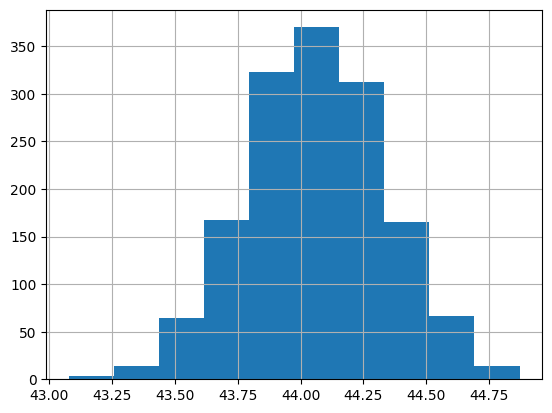

In [ ]:
muestras.mean().hist()

In [ ]:
#la media de la poblacion se puede calcular con
datos.Edad.mean()

np.float64(44.07142113482561)

In [ ]:
#la media de la media de nuestra muestra, de porsi mean ya es la media de las 1500m, necesitamos la media de esa muetras
muestras.mean().mean()

np.float64(44.059908333333325)

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [ ]:
#desviacion estnadar de las medias muestrales
muestras.mean().std()

0.2745615476710613

In [ ]:
datos.Edad.std()

12.480583465360187

In [ ]:
#vamos a dividir la desviacion estandar de nuestros datos de poblacion
#por la raiz cuadrada del tamaño de la muestra
datos.Edad.std()/np.sqrt(n)

np.float64(0.2790743302740527)

con esto obtuvimo un valor aproximadod a la desviacion estandar de la muestra, lo que no dice el teorema central del limite

y esto siempre aplicara para un n=>30

## <font color=green>4.2 Los niveles de confianza y significación</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimación sea correcta. Además, el **nivel de significancia** ($\alpha$) expresa la probabilidad de error de la estimación.

El **nivel de confianza** representa el grado de confiabilidad del resultado estimado dentro de un cierto rango. Cuando establecemos un **nivel de confianza del 95%** en una encuesta, por ejemplo, estamos asumiendo que existe una probabilidad del 95% de que los resultados de la encuesta representen bien la realidad, es decir, sean correctos.

El **nivel de confianza** de una estimación se puede obtener del área bajo la curva normal como se muestra en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img007.png' width='450px'>


## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviación estándar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

#### Con desviación estándar poblacional conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar de población desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Ejemplo: </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una población normal con **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un intervalo de confianza para el **promedio de la población** asumiendo un **nivel de significancia del 5%**.

### Media muestral

In [ ]:
media_muestra=5050
media_muestra

5050

### Nivel de significancia ($\alpha$)

In [ ]:
significancia=0.05
significancia

0.05

### Nivel de confianza ($1 - \alpha$)

In [ ]:
confianza=0.95
confianza

0.95

### Desviacion estandar

In [ ]:
desviacion_estandar=150
desviacion_estandar

150

### Obteniendo $z$

In [ ]:
tabla_normal_estandarizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


### Obteniendo $z$

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img008.png' width='450px'>

Calculando el valor z

In [ ]:
0.95/2

0.475

In [ ]:
0.5+(0.95/2)

0.975

In [ ]:
z=1.96

In [ ]:
#calcular el valor de z autoamtico
z=norm.ppf(0.975) #ppf valor de provavilidad acumulado
z

np.float64(1.959963984540054)

### Valores de $z$ para los niveles de confianza más utilizados

|Nivel de<br>confianza|Valor del área bajo<br>la curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0.95                               |1.645|
|95%               |0.975                              |1.96 |
|99%               |0.995                              |2.575|

####tarea

De la tabla anterior calcula el valor z con un nivel de confianza del 90,99

### Obteniendo $\sigma_\bar{x}$

In [ ]:
desviacion_estandar

150

In [ ]:
n=20
n

20

In [ ]:
#vamos a claular la medias muestrales
raiz_n=np.sqrt(n)
raiz_n

np.float64(44.721359549995796)

In [ ]:
sigma=desviacion_estandar/raiz_n
sigma# este es el termino de las medias muestrales

np.float64(3.3541019662496843)

### Obteniendo $e$

In [ ]:
#obtendremos el error muestral
e=z*sigma
e

np.float64(6.573919054324361)

### Solución 1 - Calculando el intervalo de confianza para la media

In [ ]:
intervalo=(
    media_muestra-e,
    media_muestra+e)
intervalo
#el peso medio de los acos de area essta dentro de estoss valores

(np.float64(5043.4260809456755), np.float64(5056.5739190543245))

### Solución 2 - Calculando el intervalo de confianza para la media

In [ ]:
#calculando lo mismo con la funcion norm.interval
norm.interval(confidence=0.95,loc=media_muestra,scale=sigma)
#el peso medio de los acos de area essta dentro de estoss valores

(np.float64(5043.4260809456755), np.float64(5056.5739190543245))

Para estimar la cantidad media gastada por cada cliente de una gran cadena de comida rápida, se seleccionó una muestra de 50 clientes.

Suponiendo que el valor de la desviación estándar de la población es de $ 6,00 y que esta población se distribuye normalmente, obtenga el margen de error de esta estimación para un nivel de confianza del 95%.

In [ ]:
z=0.5+(0.95/2)
z=norm.ppf(z)
z

np.float64(1.959963984540054)

In [ ]:
dev=6
dev

6

In [ ]:
n=50
n

50

In [ ]:
e=z*(dev/np.sqrt(n))
e

np.float64(1.6630845892196133)

Una muestra aleatoria simple de 1976 elementos de una población distribuida normalmente, con una desviación estándar de 11, dio como resultado una media muestral de 28.

¿Cuál es el intervalo de confianza del 90% para la media de la población?

In [ ]:
z=0.5+(0.90/2)
z=norm.ppf(z)
n=1976
media_muestra=28
dev=11
sigma=dev/np.sqrt(n)
e=(z*(dev/np.sqrt(n)))
norm.interval(confidence=0.90,loc=media_muestra,scale=sigma)


(np.float64(27.592969951356466), np.float64(28.407030048643534))

Lo que aprendimos en esta aula:



Los conceptos de parámetros y estimaciones
El Teorema Central de Límite
Niveles de confianza y significancia
Obtener el margen de error de un experimento
Obtener intervalos de confianza para una estimación puntual (estimación por intervalo)


# <font color=green>5 CÁLCULO DEL TAMAÑO DE LA MUESTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudiando los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

## <font color=green>5.1 Variables cuantitativas y población infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviación estándar desconocida

## $$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar de la muestra

$e$ = error inferencial

### <font color='red'>Comentarios</font>

1. La desviación estándar ($\sigma$ o $s$) y el error ($e$) deben estar en la misma unidad de medida.

2. Cuando el error ($e$) se representa en términos porcentuales, debe interpretarse como un porcentaje relacionado con el promedio.

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando los ingresos mensuales de los jefes de hogar. Nuestro supervisor determinó que el **error máximo en relación a la media es de $\$$ 100,00** pesos. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$ 3.323,39** pesos. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

In [ ]:
z=0.5+(0.95/2)
z=norm.ppf(z)
z

np.float64(1.959963984540054)

### Obteniendo $\sigma$

In [ ]:
sigma=3323.39
sigma

3323.39

### Obteniendo $e$

In [ ]:
e=100.00
e

100.0

### Obteniendo $n$

In [ ]:
n=(z*(sigma/e))**2
int(n.round())

4243

con esto tenemos que necessitamos una mestra de 4243 personas para establecer los salarios de los jefes del hogar

El valor promedio gastado por los clientes en una tienda es de $ 45.50. Suponiendo que la desviación estándar de los gastos es de $ 15.00, ¿cuál debería ser el tamaño de la muestra para estimar la media de la población con un nivel de significancia del 10%?

Tenga en cuenta que el error máximo aceptable es del 10%

In [ ]:
z=0.5+(0.90/2)
z=norm.ppf(z)
sigma=15
media=45.50
e=media*0.1
n=(z*(sigma/e))**2
int(n.round())

29

 Tenga en cuenta que cuando el error se representa en términos porcentuales, debe interpretarse como un porcentaje relacionado con la media

---
---

## <font color='red'>Problema</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

## <font color=green>5.2 Variables cuantitativas y población finita</font>
***

#### Con desviación estándar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviación estándar desconocida

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tamaño de la población

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Industria de refrescos</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

### Obteniendo $N$

In [ ]:
N=10000
N

10000

### Obteniendo $z$

In [ ]:
z=0.5+(0.95/2)
z=norm.ppf(z)
z

np.float64(1.959963984540054)

### Obteniendo $s$

In [ ]:
s=12
s

12

### Obteniendo $e$

In [ ]:
e=5
e

5

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [ ]:
n=(z**2 * ((s**2)*N)/((z**2)*(s**2)+((e**2)*(N-1))))
n=int(n.round())
n

22

este nos trae una muestra representativa de la poblacion que nos trae todos los requisitos de los parametros de acuerdo al problema, siendo una muestra de latas de 22

esto es una muestra pequeña de acuerdo a al tamaño de la muestra dado que solo 22 latas sera abiertas para revisar si el contenido de estas es viable para su venta

Un fabricante de harina encontró que, en una muestra aleatoria compuesta por 200 sacos de 25 kg de un lote compuesto por 2000 sacos, mostraba una desviación estándar muestral del peso igual a 480 g.

Considerando un error máximo asociado con el promedio poblacional de 0.3 kg y un nivel de confianza del 95%, ¿qué tamaño de muestra debe seleccionarse para obtener una estimación confiable del parámetro poblacional?

In [160]:
N=2000
s=480
e=0.3*1000 #convertir de kg para g
z=norm.ppf(0.5+(0.95/2))
n=(z**2 * ((s**2)*N)/((z**2)*(s**2)+((e**2)*(N-1))))
n=int(n.round())
n

10

## lo que aprendimos

Determinación del tamaño de una muestra, para asegurar que sea representativa de la población
Cálculo del tamaño de la muestra para variables cuantitativas finitas e infinitas

# <font color=green>6 FIJANDO EL CONTENIDO</font>
***

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando **los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil**. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79** y que la **media poblacional** es **R$\$$ 1.426,54**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio? ¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?

### Construyendo el conjunto de datos según lo especificado por el problema

### Calcular el tamaño de la muestra

### Calcular el intervalo de confianza para la media

### Realización de una prueba gráfica